# Project 2: Cardiovascular Disease Dataset

### Part 2 - EDA/Preprocessing/Feature Engineering

#### By: Amin
For this notebook, I will be doing further in-depth EDA.  
<hr>

## 1. Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')

import warnings 
warnings.filterwarnings('ignore')

## 2. Getting the Data

In [2]:
df = pd.read_csv('cleaned_data.csv')
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50.0,male,168,62.0,110,80,1,1,0,0,1,0,22.0
1,55.0,female,156,85.0,140,90,3,1,0,0,1,1,34.9
2,52.0,female,165,64.0,130,70,3,1,0,0,0,1,23.5
3,48.0,male,169,82.0,150,100,1,1,0,0,1,1,28.7
4,60.0,female,151,67.0,120,80,2,2,0,0,0,0,29.4


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,64335.0,53.400591,6.740762,30.0,49.0,54.0,58.0,65.0
height,64335.0,164.593176,7.735568,143.0,159.0,165.0,170.0,250.0
weight,64335.0,74.298360,14.081667,40.0,65.0,72.0,82.0,200.0
ap_hi,64335.0,126.650579,14.434230,85.0,120.0,120.0,140.0,179.0
ap_lo,64335.0,81.793409,7.734429,61.0,80.0,80.0,90.0,109.0
cholesterol,64335.0,1.364669,0.680633,1.0,1.0,1.0,1.0,3.0
gluc,64335.0,1.225709,0.572712,1.0,1.0,1.0,1.0,3.0
smoke,64335.0,0.087790,0.282992,0.0,0.0,0.0,0.0,1.0
alco,64335.0,0.053284,0.224600,0.0,0.0,0.0,0.0,1.0
active,64335.0,0.803606,0.397273,0.0,1.0,1.0,1.0,1.0


## 3. EDA of the Dataset

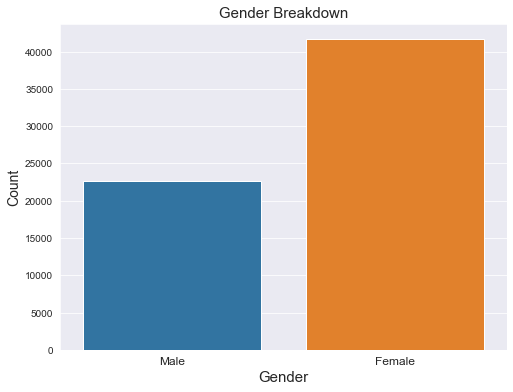

In [4]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'gender', data = df)
plt.title('Gender Breakdown', fontsize=15)
plt.xticks(ticks = [0,1 ], labels = ['Male', 'Female'], fontsize=12)
plt.xlabel('Gender', fontsize = 15)
plt.ylabel('Count', fontsize = 14)
plt.show()

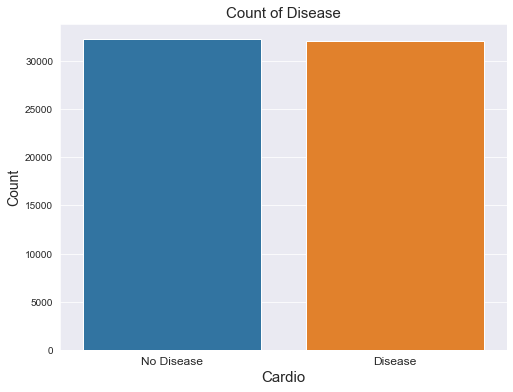

In [5]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'cardio', data = df)
plt.title('Count of Disease', fontsize=15)
plt.xticks(ticks = [0,1 ], labels = ['No Disease', 'Disease'], fontsize=12)
plt.xlabel('Cardio', fontsize = 15)
plt.ylabel('Count', fontsize = 14)
plt.show()

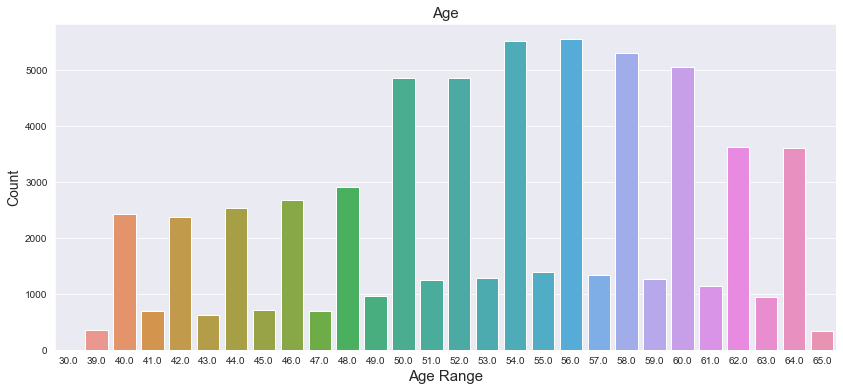

In [6]:
plt.figure(figsize = (14,6))
sns.countplot(x = 'age', data = df)
plt.title('Age', fontsize=15)
plt.xlabel('Age Range', fontsize = 15)
plt.ylabel('Count', fontsize = 14)
plt.show()

### 3.1 Getting the top & bottom 5 correlation against target variable

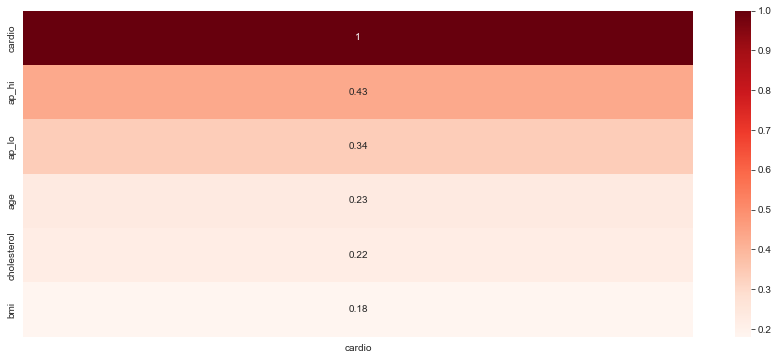

In [7]:
# Top 5 variables with highest correlation against cardio
plt.figure(figsize = (15,6))
df_corr = df.corr()[['cardio']].sort_values('cardio', ascending=False)
top_5 = df_corr.head(6)

sns.heatmap(top_5, annot = True, cmap='Reds')
plt.show()

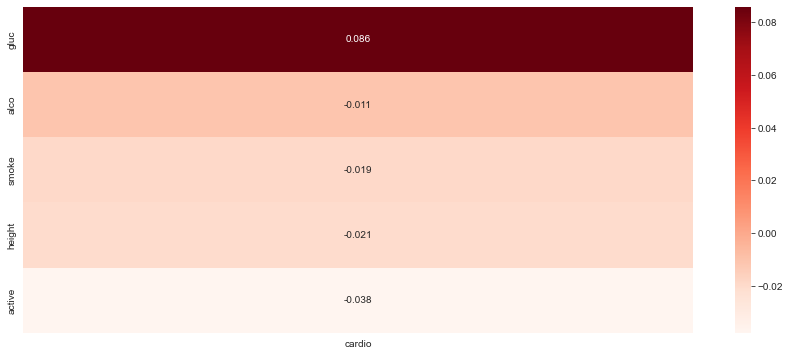

In [8]:
# Bottom 5 variables with lowest correlation against cardio
plt.figure(figsize = (15,6))
df_corr = df.corr()[['cardio']].sort_values('cardio', ascending=False)
bot_5 = df_corr.tail()

sns.heatmap(bot_5, annot = True, cmap='Reds')
plt.show()

### 3.2 Exploring the Age

In [9]:
pivot1 = df.pivot_table(index = 'cardio', columns = 'gender', values = 'age')
pivot1

gender,female,male
cardio,,
0,51.936512,51.668332
1,55.190957,54.562339


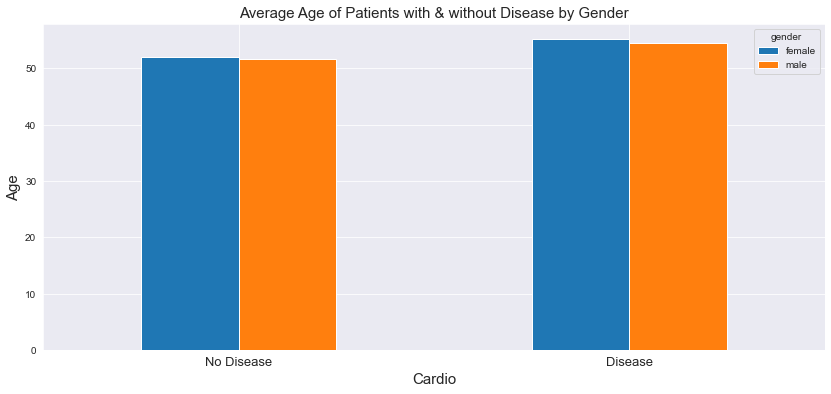

In [10]:
pivot1.plot(kind='bar', figsize=(14,6))
plt.xticks(rotation=0, fontsize=13)
plt.title('Average Age of Patients with & without Disease by Gender', fontsize=15)
plt.xlabel('Cardio', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.xticks([0, 1], ['No Disease', "Disease"])
plt.show()

In [11]:
pivot2 = df.pivot_table(index = 'cardio', columns = 'cholesterol', values = 'age')
pivot2

cholesterol,1,2,3
cardio,,,
0,51.505245,52.727379,55.274477
1,54.685003,54.418455,56.533439


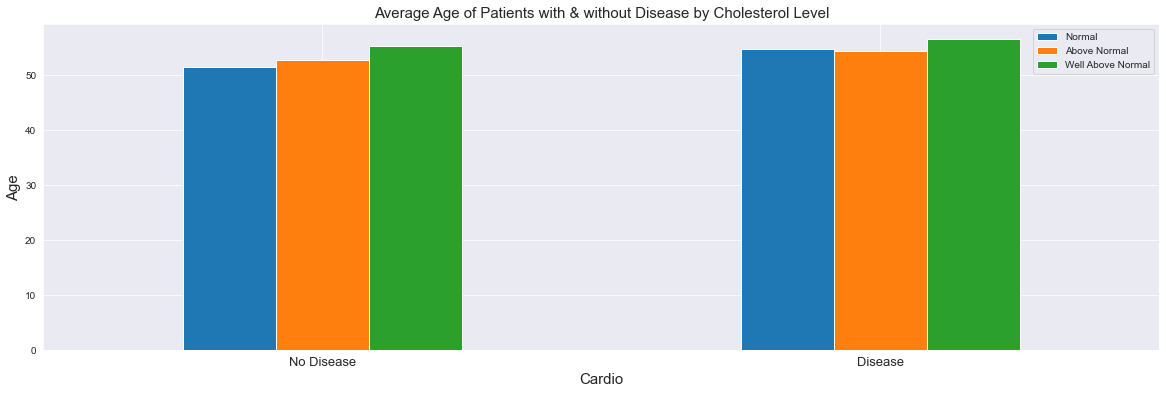

In [12]:
pivot2.plot(kind='bar', figsize = (20,6))
plt.xticks(rotation = 0, fontsize = 13)
plt.title('Average Age of Patients with & without Disease by Cholesterol Level', fontsize = 15)
plt.xlabel('Cardio', fontsize = 15)
plt.ylabel('Age', fontsize = 15)
plt.xticks([0, 1], ['No Disease', "Disease"])
plt.legend(['Normal', 'Above Normal', 'Well Above Normal'], loc = 1)
plt.show()

In [13]:
pivot3 = df.pivot_table(index = 'cardio', columns = 'gluc', values = 'age')
pivot3

gluc,1,2,3
cardio,,,
0,51.632862,52.583118,54.233174
1,54.806886,54.961933,56.386588


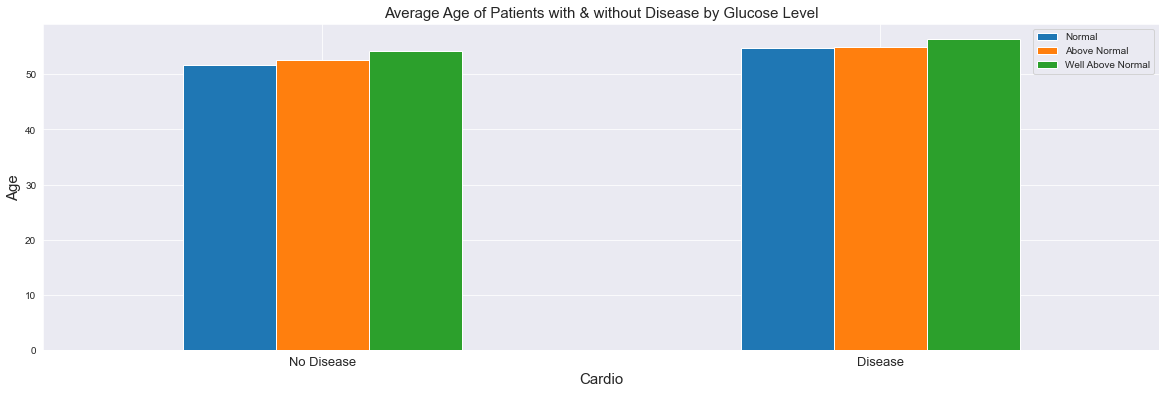

In [14]:
pivot3.plot(kind='bar', figsize = (20,6))
plt.xticks(rotation = 0, fontsize = 13)
plt.title('Average Age of Patients with & without Disease by Glucose Level', fontsize = 15)
plt.xlabel('Cardio', fontsize = 15)
plt.ylabel('Age', fontsize = 15)
plt.xticks([0, 1], ['No Disease', "Disease"])
plt.legend(['Normal', 'Above Normal', 'Well Above Normal'], loc = 1)
plt.show()

In [15]:
pivot4 = df.pivot_table(index = 'cardio', columns = 'smoke', values = 'age')
pivot4

smoke,0,1
cardio,,
0,51.924901,51.032580
1,55.079065,53.754545


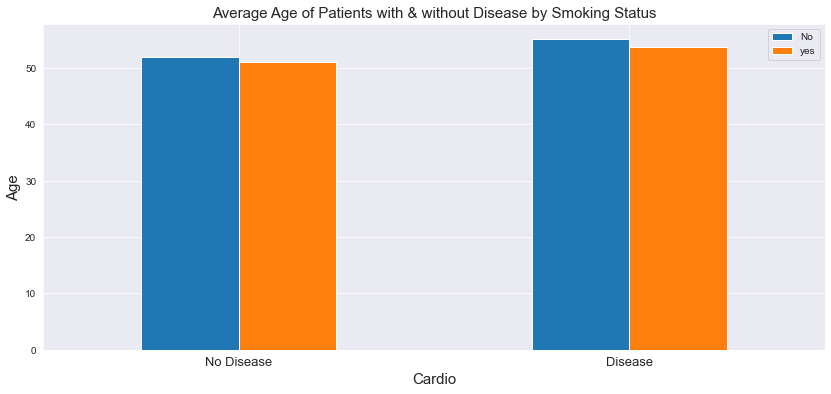

In [16]:
pivot4.plot(kind='bar', figsize = (14,6))
plt.xticks(rotation = 0, fontsize = 13)
plt.title('Average Age of Patients with & without Disease by Smoking Status', fontsize = 15)
plt.xlabel('Cardio', fontsize = 15)
plt.ylabel('Age', fontsize = 15)
plt.xticks([0, 1], ['No Disease', "Disease"])
plt.legend(['No', 'yes'])
plt.show()

In [17]:
pivot5 = df.pivot_table(index = 'cardio', columns = 'alco', values = 'age')
pivot5

alco,0,1
cardio,,
0,51.883194,51.139043
1,55.013540,54.157055


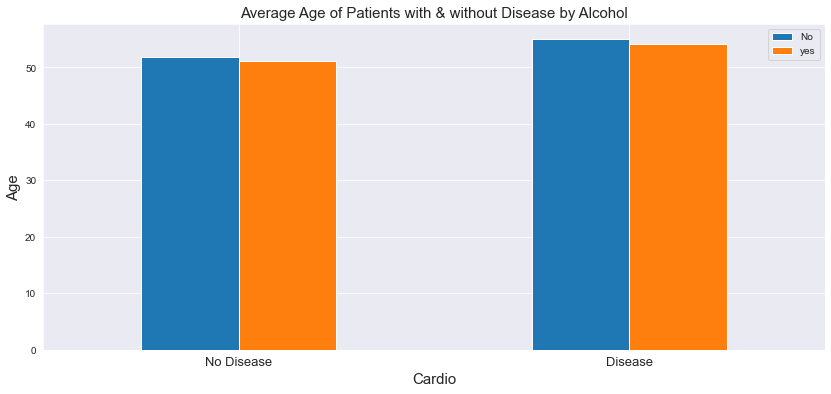

In [18]:
pivot5.plot(kind='bar', figsize = (14,6))
plt.xticks(rotation = 0, fontsize = 13)
plt.title('Average Age of Patients with & without Disease by Alcohol', fontsize = 15)
plt.xlabel('Cardio', fontsize = 15)
plt.ylabel('Age', fontsize = 15)
plt.xticks([0, 1], ['No Disease', "Disease"])
plt.legend(['No', 'yes'])
plt.show()

In [19]:
pivot6 = df.pivot_table(index = 'cardio', columns = 'active', values = 'age')
pivot6

active,0,1
cardio,,
0,51.768653,51.857943
1,55.064178,54.944741


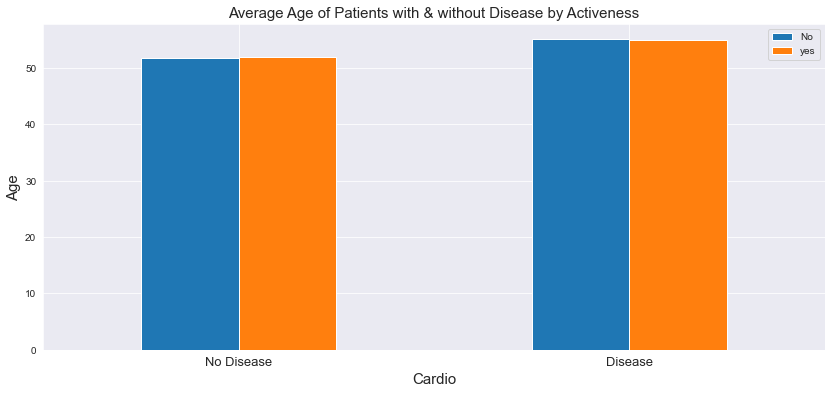

In [20]:
pivot6.plot(kind='bar', figsize = (14,6))
plt.xticks(rotation = 0, fontsize = 13)
plt.title('Average Age of Patients with & without Disease by Activeness', fontsize = 15)
plt.xlabel('Cardio', fontsize = 15)
plt.ylabel('Age', fontsize = 15)
plt.xticks([0, 1], ['No Disease', "Disease"])
plt.legend(['No', 'yes'])
plt.show()

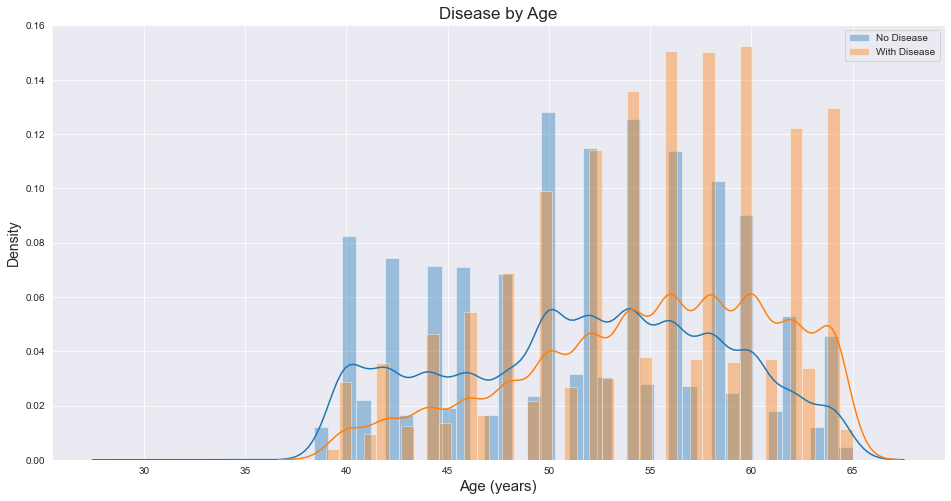

In [21]:
not_ill = df[df['cardio'] == 0]
ill = df[df['cardio'] == 1]

plt.figure(figsize=(16, 8))
sns.distplot(not_ill["age"], label='No Disease')
sns.distplot(ill["age"], label='With Disease')

plt.title('Disease by Age', fontsize = 17)
plt.xlabel('Age (years)', fontsize = 15)
plt.ylabel('Density', fontsize = 14)
plt.legend()
plt.show()

### Observations for Age with respect to other variables:  

- One of our objectives was to determine the profile for both patients with and without the presence of a cardiovascular disease. Age was one of the variables I wanted to use for this.  


- The common theme for age with respect to other variables was that, in general, individuals around the age of 55 years old tend to have a cardiovascular disease. This is irregardless of whether their cholesterol level was normal or not, whether they were active or not, and so forth.  

### 3.3 Exploring the BMI

In [22]:
pivot7 = df.pivot_table(index = 'cardio', columns = 'gender', values = 'bmi')
pivot7

gender,female,male
cardio,,
0,26.909823,25.857733
1,28.897085,27.447484


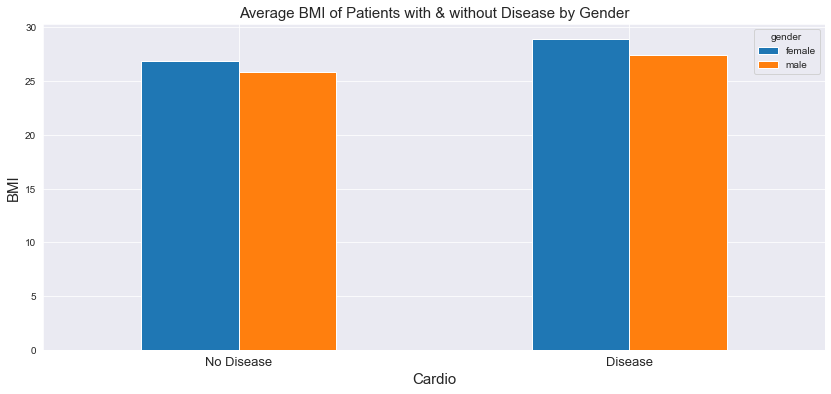

In [23]:
pivot7.plot(kind='bar', figsize = (14,6))
plt.xticks(rotation = 0, fontsize = 13)
plt.title('Average BMI of Patients with & without Disease by Gender', fontsize = 15)
plt.xlabel('Cardio', fontsize = 15)
plt.ylabel('BMI', fontsize = 15)
plt.xticks([0, 1], ['No Disease', "Disease"])
plt.show()

In [24]:
pivot8 = df.pivot_table(index = 'cardio', columns = 'cholesterol', values = 'bmi')
pivot8

cholesterol,1,2,3
cardio,,,
0,26.272680,27.692814,28.357159
1,27.848558,29.103102,29.757814


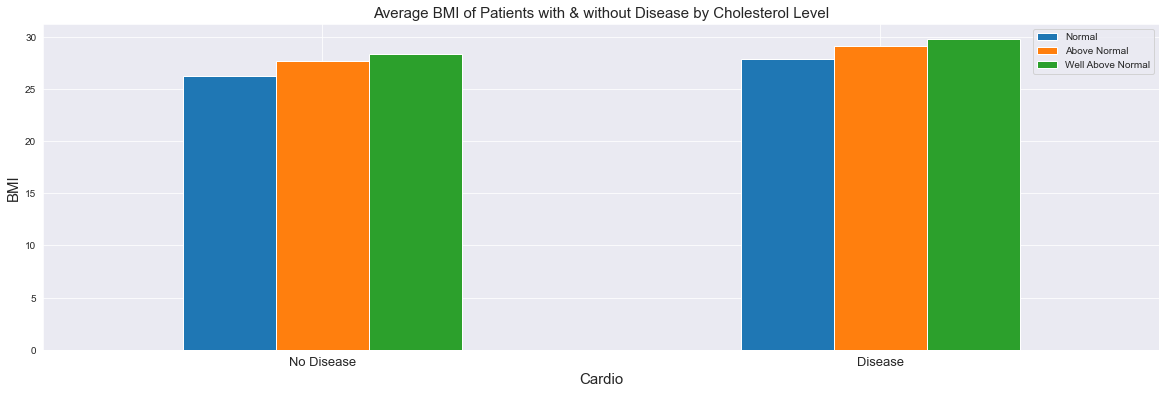

In [25]:
pivot8.plot(kind='bar', figsize = (20,6))
plt.xticks(rotation = 0, fontsize = 13)
plt.title('Average BMI of Patients with & without Disease by Cholesterol Level', fontsize = 15)
plt.xlabel('Cardio', fontsize = 15)
plt.ylabel('BMI', fontsize = 15)
plt.xticks([0, 1], ['No Disease', "Disease"])
plt.legend(['Normal', 'Above Normal', 'Well Above Normal'], loc = 1)
plt.show()

In [26]:
pivot9 = df.pivot_table(index = 'cardio', columns = 'gluc', values = 'bmi')
pivot9

gluc,1,2,3
cardio,,,
0,26.334978,28.295391,27.801855
1,28.088530,30.097621,29.435371


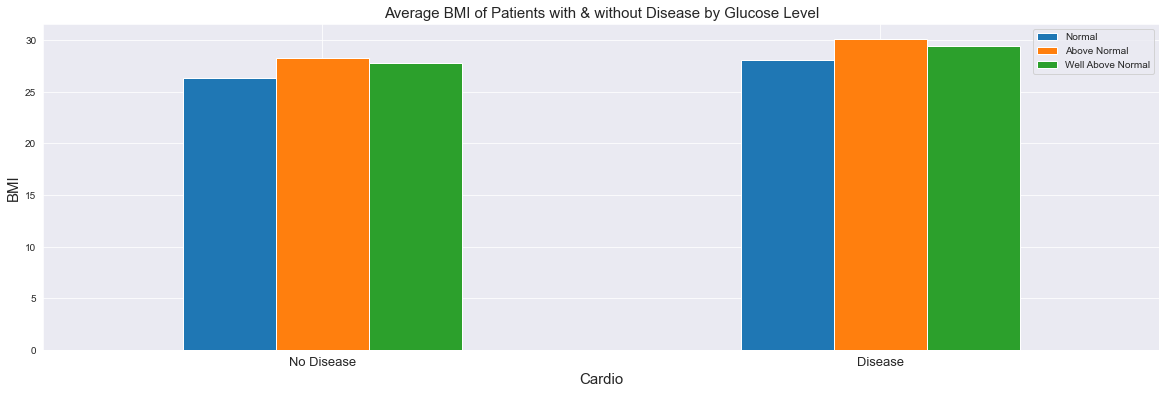

In [27]:
pivot9.plot(kind='bar', figsize = (20,6))
plt.xticks(rotation = 0, fontsize = 13)
plt.title('Average BMI of Patients with & without Disease by Glucose Level', fontsize = 15)
plt.xlabel('Cardio', fontsize = 15)
plt.ylabel('BMI', fontsize = 15)
plt.xticks([0, 1], ['No Disease', "Disease"])
plt.legend(['Normal', 'Above Normal', 'Well Above Normal'], loc = 1)
plt.show()

In [28]:
pivot10 = df.pivot_table(index = 'cardio', columns = 'smoke', values = 'bmi')
pivot10

smoke,0,1
cardio,,
0,26.589623,26.035971
1,28.430059,27.913712


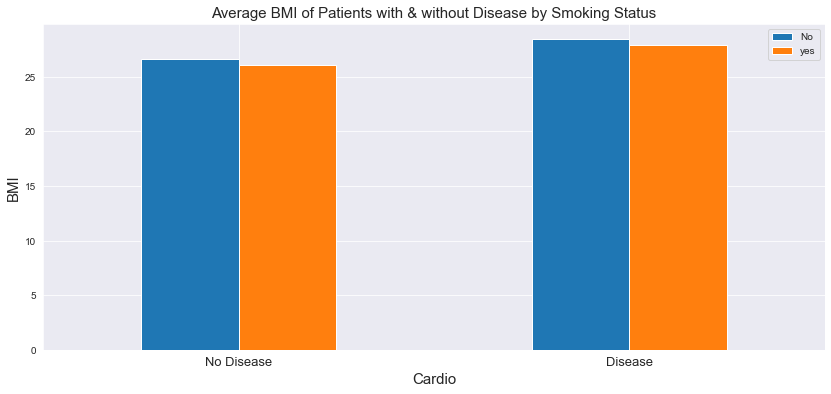

In [29]:
pivot10.plot(kind='bar', figsize = (14,6))
plt.xticks(rotation = 0, fontsize = 13)
plt.title('Average BMI of Patients with & without Disease by Smoking Status', fontsize = 15)
plt.xlabel('Cardio', fontsize = 15)
plt.ylabel('BMI', fontsize = 15)
plt.xticks([0, 1], ['No Disease', "Disease"])
plt.legend(['No', 'yes'])
plt.show()

In [30]:
pivot11 = df.pivot_table(index = 'cardio', columns = 'alco', values = 'bmi')
pivot11

alco,0,1
cardio,,
0,26.522800,26.796107
1,28.358586,28.928037


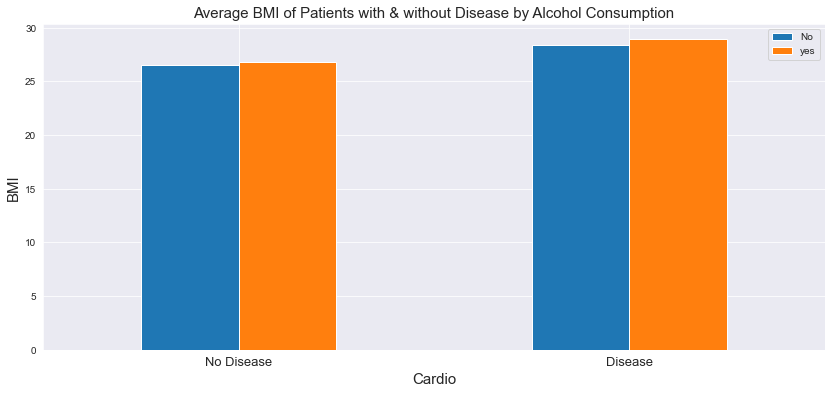

In [31]:
pivot11.plot(kind='bar', figsize = (14,6))
plt.xticks(rotation = 0, fontsize = 13)
plt.title('Average BMI of Patients with & without Disease by Alcohol Consumption', fontsize = 15)
plt.xlabel('Cardio', fontsize = 15)
plt.ylabel('BMI', fontsize = 15)
plt.xticks([0, 1], ['No Disease', "Disease"])
plt.legend(['No', 'yes'])
plt.show()

In [32]:
pivot12 = df.pivot_table(index = 'cardio', columns = 'active', values = 'bmi')
pivot12

active,0,1
cardio,,
0,26.537511,26.538139
1,28.459457,28.368257


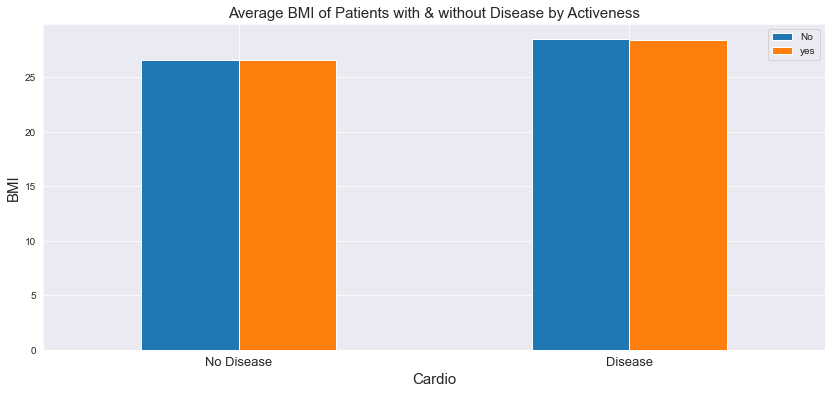

In [33]:
pivot12.plot(kind='bar', figsize = (14,6))
plt.xticks(rotation = 0, fontsize = 13)
plt.title('Average BMI of Patients with & without Disease by Activeness', fontsize = 15)
plt.xlabel('Cardio', fontsize = 15)
plt.ylabel('BMI', fontsize = 15)
plt.xticks([0, 1], ['No Disease', "Disease"])
plt.legend(['No', 'yes'])
plt.show()

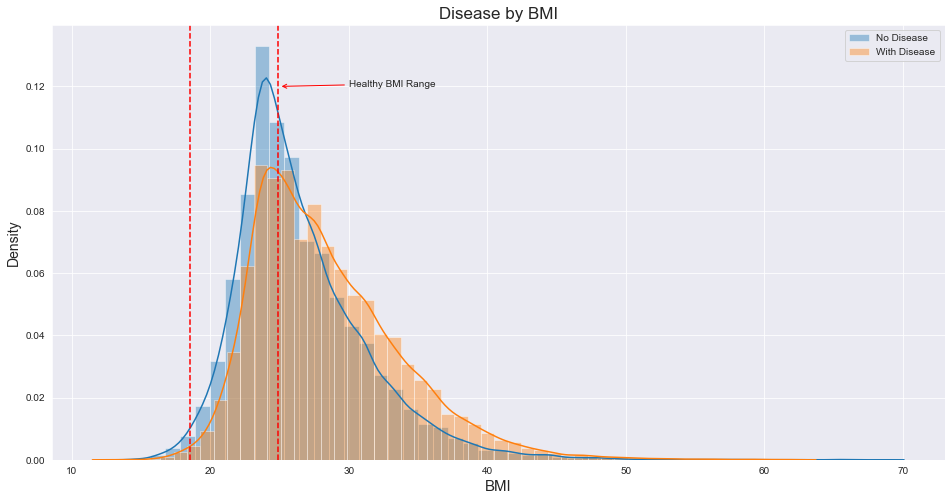

In [34]:
plt.figure(figsize=(16, 8))
sns.distplot(not_ill["bmi"], label='No Disease')
sns.distplot(ill["bmi"], label='With Disease')

plt.axvline(x = 18.5, color = 'r', linestyle = '--')
plt.axvline(x = 24.9, color = 'r', linestyle = '--')

plt.annotate('Healthy BMI Range', xy = (25, 0.12), xytext = (30, 0.12), arrowprops = {'arrowstyle':'->', 'color':'red'})

plt.title('Disease by BMI', fontsize = 17)
plt.xlabel('BMI', fontsize = 15)
plt.ylabel('Density', fontsize = 14)
plt.legend()
plt.show()

#### Healthy range is between 18.5 - 24.9 according to this site:  
https://www.nhs.uk/common-health-questions/lifestyle/what-is-the-body-mass-index-bmi/#:~:text=For%20most%20adults%2C%20an%20ideal,the%2018.5%20to%2024.9%20range.

### Observations for BMI with respect to other variables:  

- BMI is another variable I wanted to use to build up a profile of an individual with cardiovascular disease. Our comparison using BMI had similar results with the age variable.  


- The common theme for BMI with respect to other variables was that individuals with higher BMI tend to have a cardiovascular disease. This is was the case across all the varibles we compared BMI with. Higher BMI showed more likelihood of a cardiovascular disease.  

### 3.4 Comparing against target variable: cardio

cholesterol      1     2     3
cardio                        
0            27072  3437  1767
1            21251  5126  5682


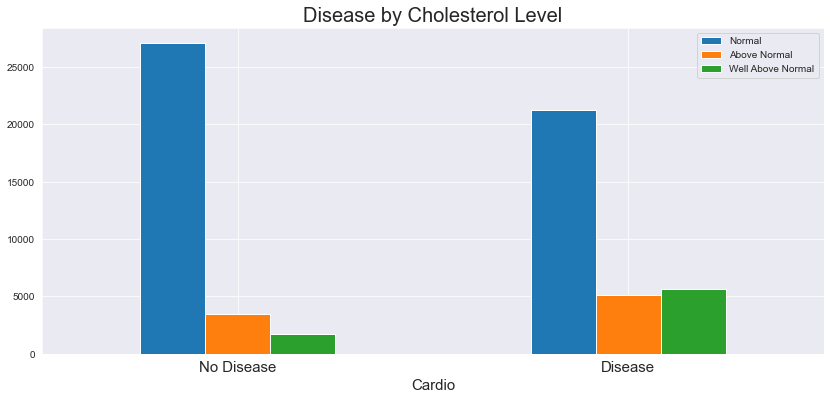

In [35]:
print(df.groupby(['cardio', 'cholesterol']).size().unstack())
df.groupby(['cardio', 'cholesterol']).size().unstack().plot(kind='bar', figsize=(14,6))

plt.title('Disease by Cholesterol Level', fontsize = 20)
plt.xticks(ticks = [0,1 ], labels = ['No Disease', 'Disease'], fontsize=15, rotation = 0)
plt.xlabel('Cardio', fontsize = 15)
plt.legend(['Normal', 'Above Normal', 'Well Above Normal'])
plt.show()

**Observations:**  Noticeable difference can be seen between individuals with and without cardiovascular disease.  

- Count of individuals with normal cholesterol levels are **lesser** in diseased group.  
- Count of individuals with above normal cholesterol levels are **more** in diseased group.  
- Count of individuals with way above cholesterol levels are **more** in diseased group.  

gluc        1     2     3
cardio                   
0       28458  1931  1887
1       26285  2732  3042


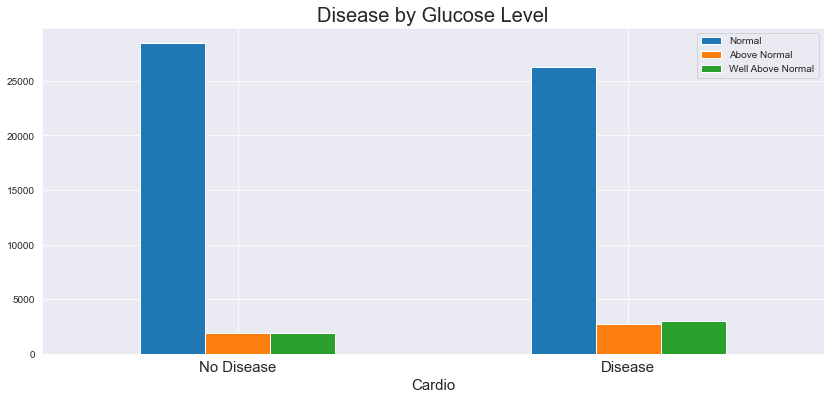

In [36]:
print(df.groupby(['cardio', 'gluc']).size().unstack())
df.groupby(['cardio', 'gluc']).size().unstack().plot(kind='bar', figsize=(14,6))

plt.title('Disease by Glucose Level', fontsize = 20)
plt.xticks(ticks = [0,1 ], labels = ['No Disease', 'Disease'], fontsize=15, rotation = 0)
plt.xlabel('Cardio', fontsize = 15)
plt.legend(['Normal', 'Above Normal', 'Well Above Normal'])
plt.show()

**Observations:**  Slight difference can be seen between individuals with and without cardiovascular disease.  

- Count of individuals with normal glucose levels are **lesser** in diseased group.  
- Count of individuals with above normal glucose levels are **more** in diseased group.  
- Count of individuals with way above glucose levels are **more** in diseased group.  

smoke       0     1
cardio             
0       29268  3008
1       29419  2640


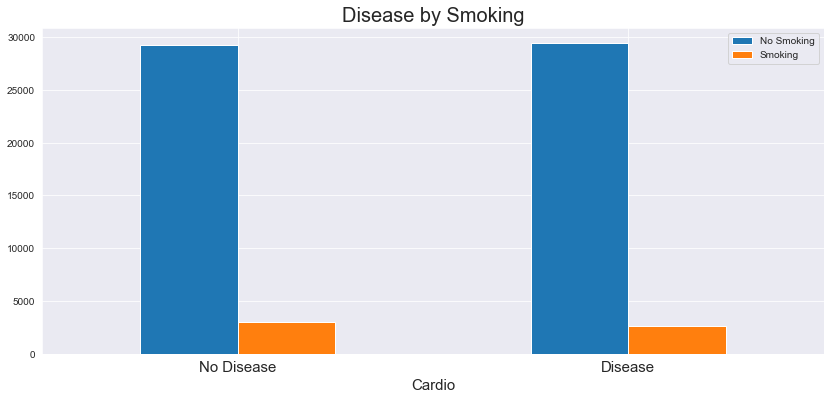

In [37]:
print(df.groupby(['cardio', 'smoke']).size().unstack())
df.groupby(['cardio', 'smoke']).size().unstack().plot(kind='bar', figsize=(14,6))

plt.title('Disease by Smoking', fontsize = 20)
plt.xticks(ticks = [0,1 ], labels = ['No Disease', 'Disease'], fontsize=15, rotation = 0)
plt.xlabel('Cardio', fontsize = 15)
plt.legend(['No Smoking', 'Smoking'])
plt.show()

**Observations:**  Negligible difference observed between individuals with and without cardiovascular disease.  

- Count of individuals who smokes versus those who doesn't is **minimal**.  

alco        0     1
cardio             
0       30478  1798
1       30429  1630


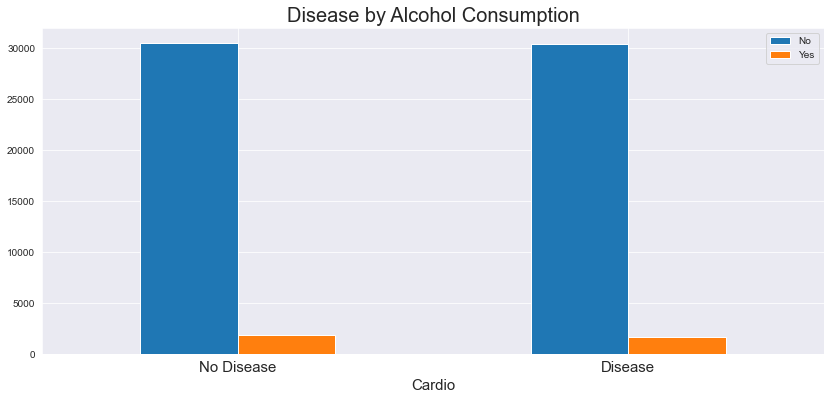

In [38]:
print(df.groupby(['cardio', 'alco']).size().unstack())
df.groupby(['cardio', 'alco']).size().unstack().plot(kind='bar', figsize=(14,6))

plt.title('Disease by Alcohol Consumption', fontsize = 20)
plt.xticks(ticks = [0,1 ], labels = ['No Disease', 'Disease'], fontsize=15, rotation = 0)
plt.xlabel('Cardio', fontsize = 15)
plt.legend(['No', 'Yes'])
plt.show()

**Observations:**  Negligible difference observed between individuals with and without cardiovascular disease.  

- Count of individuals who drinks alcohol versus those who doesn't is **minimal**.  

active     0      1
cardio             
0       5857  26419
1       6778  25281


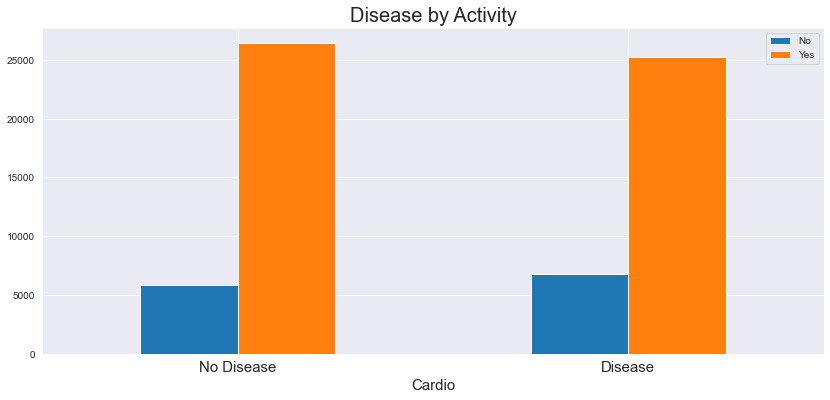

In [39]:
print(df.groupby(['cardio', 'active']).size().unstack())
df.groupby(['cardio', 'active']).size().unstack().plot(kind='bar', figsize=(14,6))

plt.title('Disease by Activity', fontsize = 20)
plt.xticks(ticks = [0,1 ], labels = ['No Disease', 'Disease'], fontsize=15, rotation = 0)
plt.xlabel('Cardio', fontsize = 15)
plt.legend(['No', 'Yes'])
plt.show()

**Observations:**  Slight difference observed between individuals with and without cardiovascular disease.  

- Count of individuals who are active are **lesser** in diseased group.  
- Count of individuals who are not active are **more** in diseased group.  

#### Healthy BMI range is between 18.5 - 24.9.  

In [40]:
df['bmi_grp'] = np.where(df['bmi'] < 18.5, 'Under', 
                        np.where(df['bmi'] <= 24.9, 'Normal', 
                                np.where(df['bmi'] > 24.9, 'Over', 0)))

bmi_grp  Normal   Over  Under
cardio                       
0         13808  18131    337
1          9387  22526    146


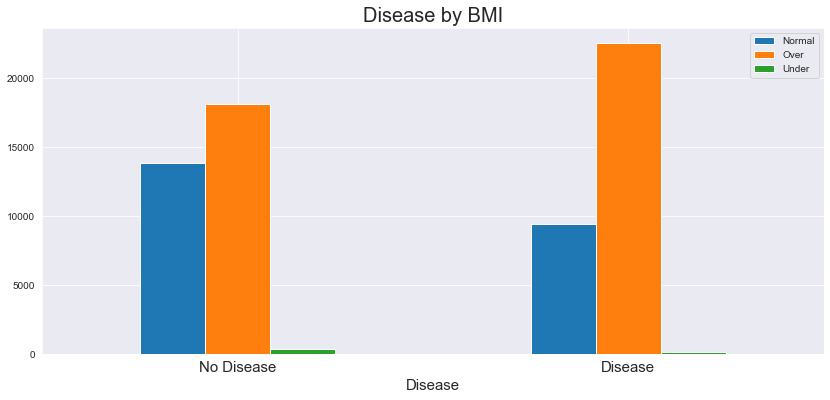

In [41]:
print(df.groupby(['cardio', 'bmi_grp']).size().unstack())
df.groupby(['cardio', 'bmi_grp']).size().unstack().plot(kind='bar', figsize=(14,6))

plt.title('Disease by BMI', fontsize = 20)
plt.xticks(ticks = [0,1 ], labels = ['No Disease', 'Disease'], fontsize=15, rotation = 0)
plt.xlabel('Disease', fontsize = 15)
plt.legend(['Normal', 'Over', 'Under'])
plt.show()

**Observations:**  Noticeable difference can be seen between individuals with and without cardiovascular disease.  

- Count of individuals with normal BMI are **lesser** in diseased group.  
- Count of individuals with above normal BMI are **more** in diseased group.  
- Count of individuals with below normal BMI are **negligible** in diseased group.  

### 3.5 Comparing against BMI

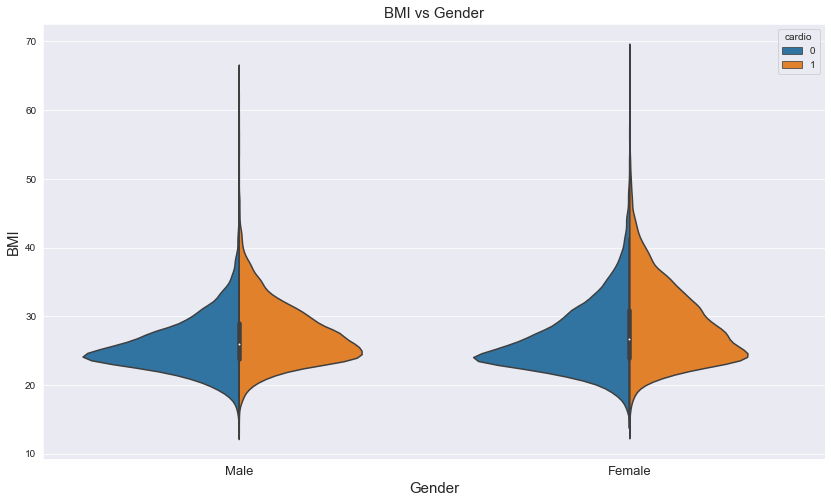

In [42]:
plt.figure(figsize=(14, 8))
sns.violinplot(y=df["bmi"], x=df["gender"], data=df, hue="cardio", split = True)
plt.xticks([0,1], ['Male', 'Female'], rotation=0, fontsize=13)
plt.title('BMI vs Gender', fontsize=15)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('BMI', fontsize=15)
plt.show()

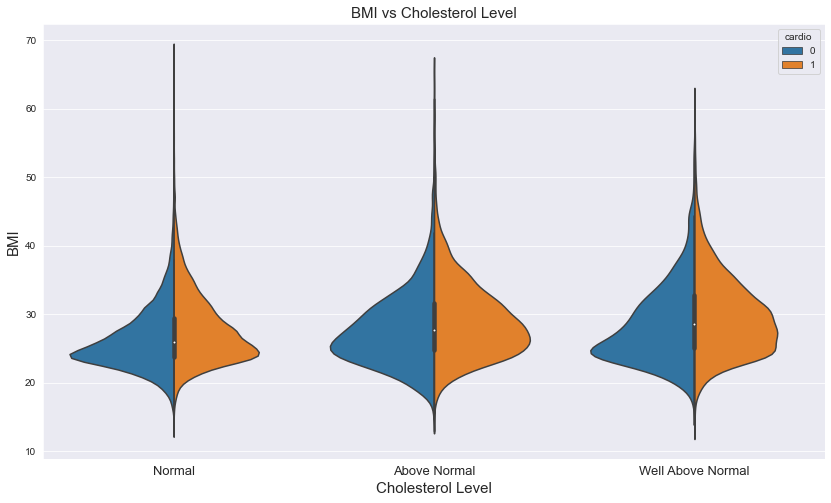

In [43]:
plt.figure(figsize=(14, 8))
sns.violinplot(y=df["bmi"], x=df["cholesterol"], data=df, hue="cardio", split = True)
plt.xticks([0,1,2], ['Normal', 'Above Normal', 'Well Above Normal'], rotation=0, fontsize=13)
plt.title('BMI vs Cholesterol Level', fontsize=15)
plt.xlabel('Cholesterol Level', fontsize=15)
plt.ylabel('BMI', fontsize=15)
plt.show()

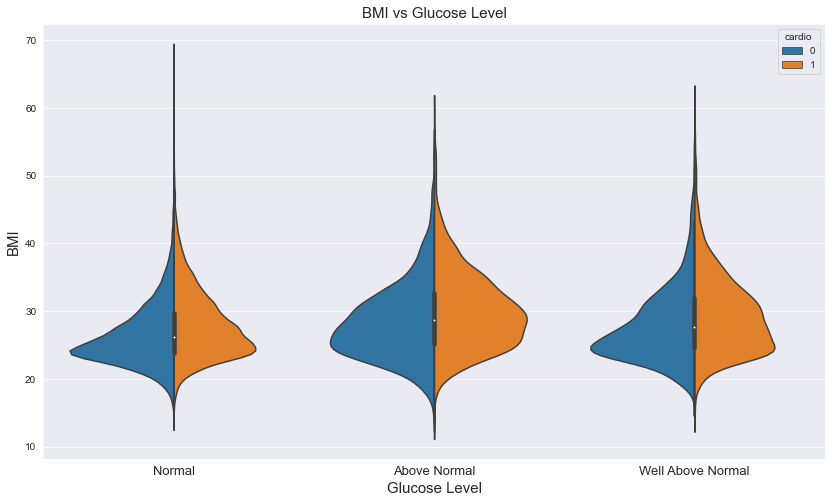

In [44]:
plt.figure(figsize=(14, 8))
sns.violinplot(y=df["bmi"], x=df["gluc"], data=df, hue="cardio", split = True)
plt.xticks([0,1,2], ['Normal', 'Above Normal', 'Well Above Normal'], rotation=0, fontsize=13)
plt.title('BMI vs Glucose Level', fontsize=15)
plt.xlabel('Glucose Level', fontsize=15)
plt.ylabel('BMI', fontsize=15)
plt.show()

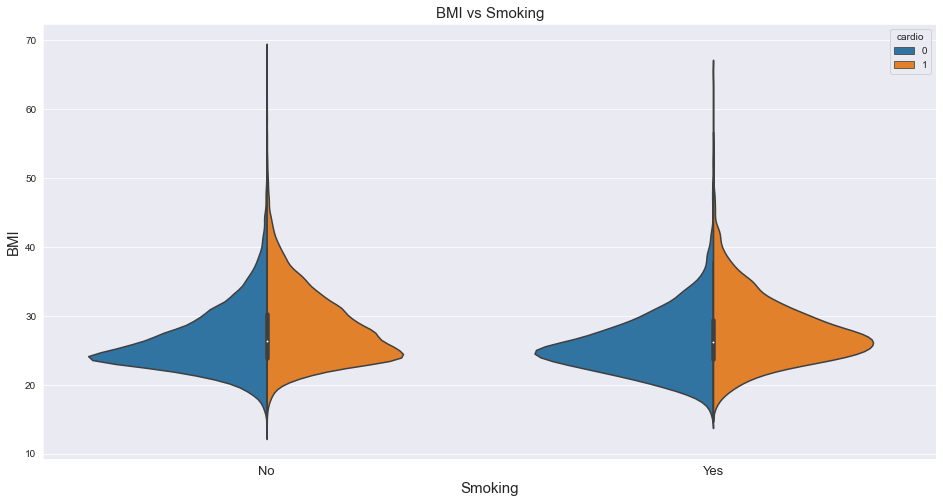

In [45]:
plt.figure(figsize=(16, 8))
sns.violinplot(y=df["bmi"], x=df["smoke"], data=df, hue="cardio", split = True)
plt.xticks([0, 1], ['No', 'Yes'], rotation=0, fontsize=13)
plt.title('BMI vs Smoking', fontsize=15)
plt.xlabel('Smoking', fontsize=15)
plt.ylabel('BMI', fontsize=15)
plt.show()

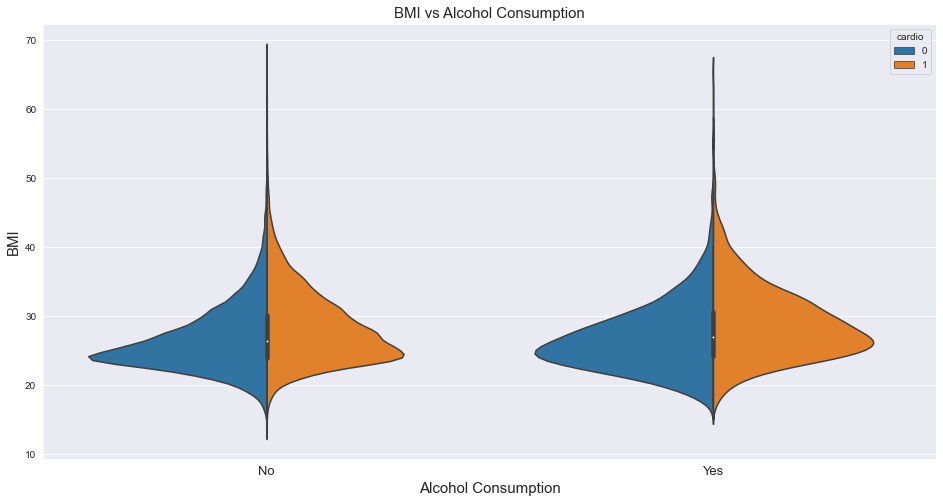

In [46]:
plt.figure(figsize=(16, 8))
sns.violinplot(y=df["bmi"], x=df["alco"], data=df, hue="cardio", split = True)
plt.xticks([0, 1], ['No', 'Yes'], rotation=0, fontsize=13)
plt.title('BMI vs Alcohol Consumption', fontsize=15)
plt.xlabel('Alcohol Consumption', fontsize=15)
plt.ylabel('BMI', fontsize=15)
plt.show()

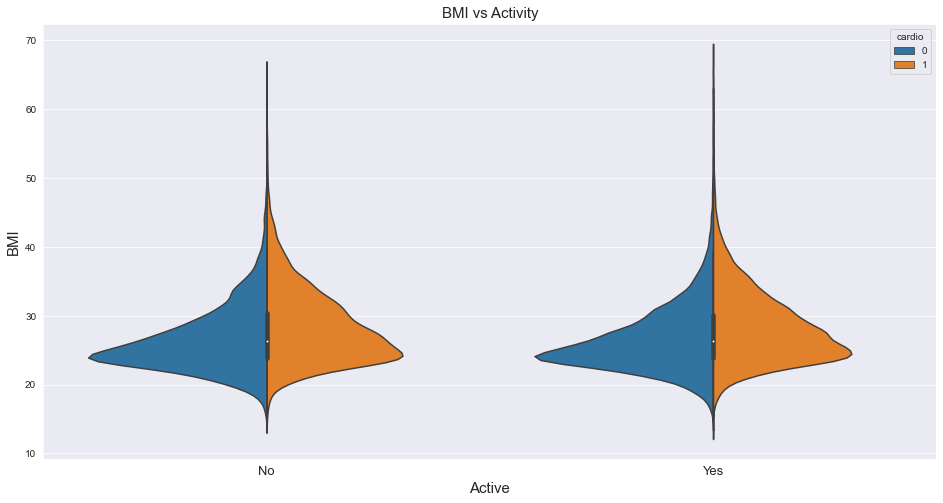

In [47]:
plt.figure(figsize=(16, 8))
sns.violinplot(y=df["bmi"], x=df["active"], data=df, hue="cardio", split = True)
plt.xticks([0, 1], ['No', 'Yes'], rotation=0, fontsize=13)
plt.title('BMI vs Activity', fontsize=15)
plt.xlabel('Active', fontsize=15)
plt.ylabel('BMI', fontsize=15)
plt.show()

## 4. Prepare Dataset for Modeling  

### 4.1 Adjusting gender, ap_hi & ap_lo columns

In [48]:
# Gender
df['gender'] = np.where(df['gender'] == 'male', 1, 
                       np.where(df['gender'] == 'female', 0, 0))
# Systolic BP
df['ap_hi'] = np.where(df['ap_hi'] <= 90, 'low', 
                       np.where(df['ap_hi'] < 130, 'normal', 'high'))
# Diastolic BP
df['ap_lo'] = np.where(df['ap_lo'] <= 60, 'low', 
                       np.where(df['ap_lo'] < 80, 'normal', 'high'))

https://www.nia.nih.gov/health/high-blood-pressure-and-older-adults#:~:text=Normal%20blood%20pressure%20for%20most,pressure%20of%20less%20than%2080.

### 4.2 Applying pandas.dummies_get() method

In [49]:
df = pd.get_dummies(df, columns = ['bmi_grp', 'ap_hi', 'ap_lo'], drop_first = True, prefix = ['bmi', 'systolic', 'diastolic'])

### 4.3 Tidying up the Columns

In [50]:
def cleaned_col(column_names):
    cleaned_cols = []
    for c in column_names:
        c = c.lower().replace(' ', '_')
        cleaned_cols.append(c)
    return cleaned_cols

In [51]:
df.columns = cleaned_col(df.columns)

### 4.4 Creating Age Classes

In [52]:
def age_ranges(x):
    if x >= 60:
        age_class = 4
    elif x >= 50 and x < 60:
        age_class = 3
    elif x >= 40 and x < 50:
        age_class = 2
    else:
        age_class = 1
    return age_class

In [53]:
df['age'] = df['age'].apply(age_ranges)
df['age'].value_counts(normalize = True)*100

3    50.740654
2    25.841299
4    22.872464
1     0.545582
Name: age, dtype: float64

In [54]:
df.head()

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_over,bmi_under,systolic_low,systolic_normal,diastolic_normal
0,3,1,168,62.0,1,1,0,0,1,0,22.0,0,0,0,1,0
1,3,0,156,85.0,3,1,0,0,1,1,34.9,1,0,0,0,0
2,3,0,165,64.0,3,1,0,0,0,1,23.5,0,0,0,0,1
3,2,1,169,82.0,1,1,0,0,1,1,28.7,1,0,0,0,0
4,4,0,151,67.0,2,2,0,0,0,0,29.4,1,0,0,1,0


## 5. Saving Finalized Dataset

In [55]:
df.to_csv('finalized_data.csv', index = False)